In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Summary of Weather.csv")

C:\Users\semav\AppData\Local\Temp\ipykernel_3592\2360501030.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


In [4]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
delCol = ['WindGustSpd', 'FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
df.drop(delCol, axis=1, inplace=True)


In [9]:
df[df.isnull().any(axis=1)]

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85.0,65.0,75.0,0.0,NaN,NaN,1.0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,1.0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83.0,65.0,74.0,0.0,NaN,NaN,NaN


In [10]:
delCol2 = ["PoorWeather", "DR", "SPD", "SND", "PGT", "TSHDSBRSGF"]
df.drop(delCol2, axis=1, inplace=True)

In [11]:
df[df.isnull().any(axis=1)]

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
900,10001,1944-12-18,0,31.111111,23.333333,27.222222,0.0,44,12,18,NaN,88.0,74.0,81.0,0.0
1744,10002,1945-1-18,0,31.666667,25.000000,27.222222,0.0,45,1,18,NaN,89.0,77.0,81.0,0.0
1916,10002,1945-7-9,0,26.666667,22.777778,24.444444,0.0,45,7,9,NaN,80.0,73.0,76.0,0.0
1917,10002,1945-7-10,0,26.666667,23.333333,25.000000,0.0,45,7,10,NaN,80.0,74.0,77.0,0.0
1918,10002,1945-7-11,0,25.555556,23.888889,24.444444,0.0,45,7,11,NaN,78.0,75.0,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118841,82506,1945-5-17,0,22.222222,11.111111,16.666667,0.0,45,5,17,NaN,72.0,52.0,62.0,0.0
118842,82506,1945-5-18,0,23.888889,11.666667,17.777778,0.0,45,5,18,NaN,75.0,53.0,64.0,0.0
118843,82506,1945-5-19,0,21.666667,13.333333,17.777778,0.0,45,5,19,NaN,71.0,56.0,64.0,0.0
118844,82506,1945-5-20,0,20.000000,13.888889,16.666667,0.0,45,5,20,NaN,68.0,57.0,62.0,0.0


In [12]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 13.6+ MB


In [14]:
delCol3 = ["Date", "Precip", "Snowfall", "PRCP", "SNF"]
df.drop(delCol3, axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   YR        119040 non-null  int64  
 5   MO        119040 non-null  int64  
 6   DA        119040 non-null  int64  
 7   MAX       118566 non-null  float64
 8   MIN       118572 non-null  float64
 9   MEA       118542 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 9.1 MB


In [16]:
df.isnull().sum()

STA           0
MaxTemp       0
MinTemp       0
MeanTemp      0
YR            0
MO            0
DA            0
MAX         474
MIN         468
MEA         498
dtype: int64

In [17]:
delCol4 = ["MAX", "MIN", "MEA"]
df.drop(delCol4, axis=1, inplace=True)

In [18]:
df.isnull().sum()

STA         0
MaxTemp     0
MinTemp     0
MeanTemp    0
YR          0
MO          0
DA          0
dtype: int64

In [19]:
df.shape

(119040, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   MaxTemp   119040 non-null  float64
 2   MinTemp   119040 non-null  float64
 3   MeanTemp  119040 non-null  float64
 4   YR        119040 non-null  int64  
 5   MO        119040 non-null  int64  
 6   DA        119040 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 6.4 MB


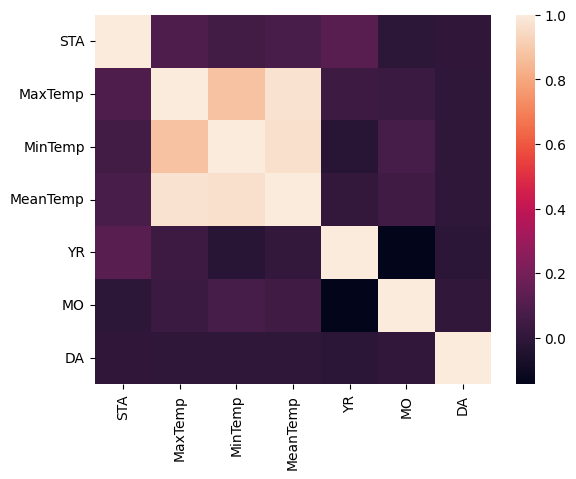

In [21]:
sns.heatmap(df.corr())
plt.show()

In [22]:
X = df.drop("MaxTemp", axis=1)
y= df["MaxTemp"]
X.head()

,STA,MinTemp,MeanTemp,YR,MO,DA
0,10001,22.222222,23.888889,42,7,1
1,10001,21.666667,25.555556,42,7,2
2,10001,22.222222,24.444444,42,7,3
3,10001,22.222222,24.444444,42,7,4
4,10001,21.666667,24.444444,42,7,5


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 15)

In [27]:
X_train.shape

(89280, 6)

In [28]:
X_train.corr()

,STA,MinTemp,MeanTemp,YR,MO,DA
STA,1.000000,0.059433,0.078366,0.122432,-0.007741,0.000745
MinTemp,0.059433,1.000000,0.966279,-0.018789,0.070288,-0.001080
MeanTemp,0.078366,0.966279,1.000000,0.012514,0.051870,-0.002143
YR,0.122432,-0.018789,0.012514,1.000000,-0.144283,-0.009257
MO,-0.007741,0.070288,0.051870,-0.144283,1.000000,0.008119
DA,0.000745,-0.001080,-0.002143,-0.009257,0.008119,1.000000


In [29]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()          
    corr = df.corr()                 
    for i in range(len(corr.columns)):
        for j in range(i):  
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i]) 
    return columns_to_drop

In [32]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [33]:
columns_dropping

{'MeanTemp'}

In [34]:
X_train.drop(columns_dropping, axis=1, inplace=True)
X_test.drop(columns_dropping, axis=1, inplace=True)

In [35]:
X_train.shape

(89280, 5)

In [36]:
X_test.shape

(29760, 5)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

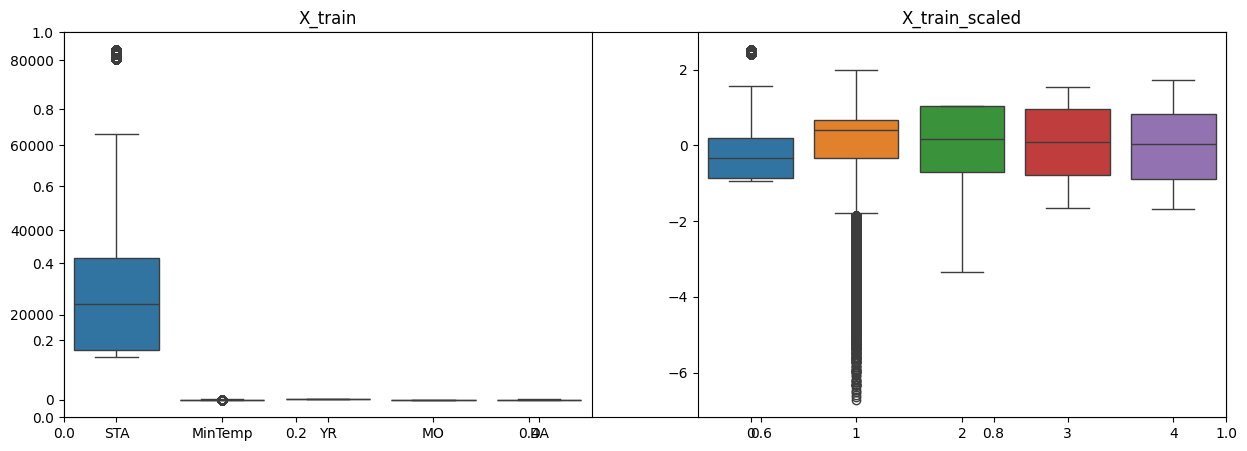

In [39]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Eror: 3.183572362129132
Mean Squared Eror: 17.456985469457326
R2 Score: 0.7700972976415619


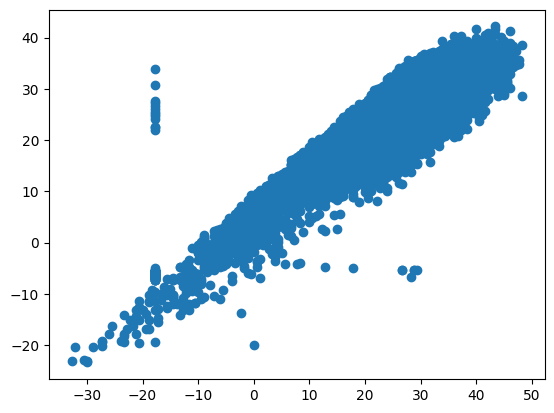

In [42]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Eror:", mae)
print("Mean Squared Eror:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.show()


Mean Absolute Eror: 3.1835672346019024
Mean Squared Eror: 17.45698779363899
R2 Score: 0.7700972670328612


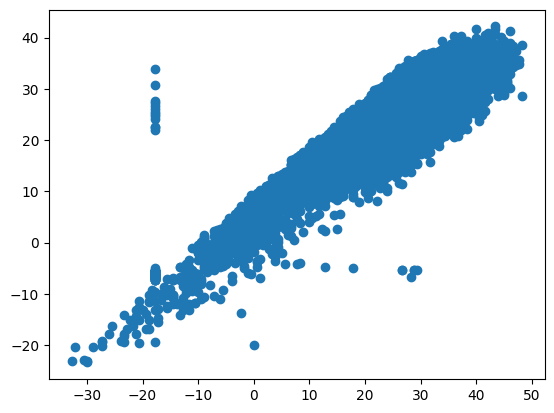

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Eror:", mae)
print("Mean Squared Eror:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Eror: 3.487585994731267
Mean Squared Eror: 26.102494051683244
R2 Score: 0.6562388201974265


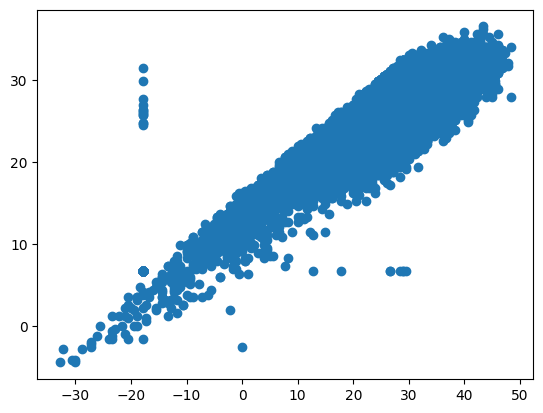

In [44]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Eror:", mae)
print("Mean Squared Eror:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Eror: 3.182671661299637
Mean Squared Eror: 17.457485265980797
R2 Score: 0.7700907154872961


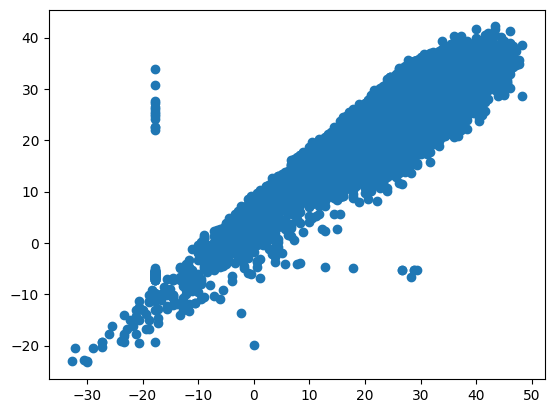

In [45]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Eror:", mae)
print("Mean Squared Eror:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Eror: 3.1794417573372282
Mean Squared Eror: 17.463454781151366
R2 Score: 0.7700120989545687


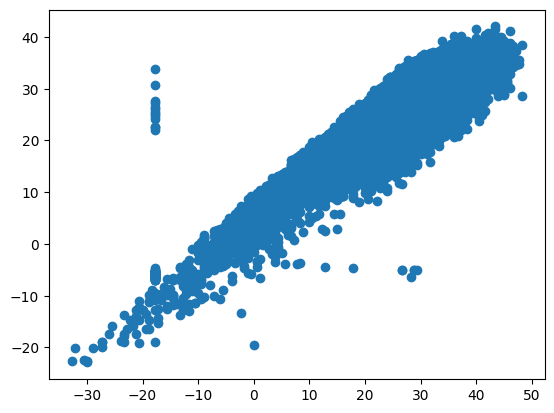

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Eror:", mae)
print("Mean Squared Eror:", mse)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.show()